In [1]:
#region imports
from IPython import get_ipython

# noinspection PyBroadException
try:
    _magic = get_ipython().run_line_magic
    _magic("load_ext", "autoreload")
    _magic("autoreload", "2")
except:
    pass

# noinspection PyUnresolvedReferences
import datetime as dt
# noinspection PyUnresolvedReferences
import glob
# noinspection PyUnresolvedReferences
import os
# noinspection PyUnresolvedReferences
import pprint
# noinspection PyUnresolvedReferences
import sys
# noinspection PyUnresolvedReferences
import cartopy as crt
# noinspection PyUnresolvedReferences
import matplotlib as mpl
# noinspection PyUnresolvedReferences
import matplotlib.colors
# noinspection PyUnresolvedReferences
import matplotlib.pyplot as plt
# noinspection PyUnresolvedReferences
import numpy as np
# noinspection PyUnresolvedReferences
import pandas as pd
# noinspection PyUnresolvedReferences
import seaborn as sns
# noinspection PyUnresolvedReferences
import xarray as xr
# noinspection PyUnresolvedReferences
#import bnn_tools.bnn_array

plt.style.use('default')
xr.set_options(
    display_expand_data = False,
    display_expand_data_vars = True,
    display_max_rows = 10,
    display_style = 'html',
    display_width = 80,
    display_expand_attrs = False
);
#endregion

0

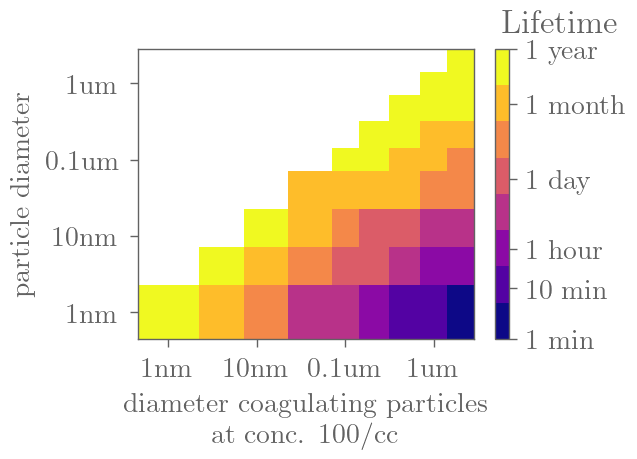

In [93]:
#region sciplot
# noinspection PyUnresolvedReferences
import scienceplots
plt.style.use([
    'default',
    # 'science',
    # 'notebook',
    'acp',
    'sp-grid',
    'no-black'
])
#endregion sciplot
res = (
    pd.read_excel('Book1.xlsx', index_col=0)
    .applymap(lambda d: str(d).replace('days','*24*3600'))
    .applymap(lambda d: str(d).replace('d','*24*3600'))
    .applymap(lambda d: str(d).replace('h','*3600'))
    .applymap(lambda d: str(d).replace('min','*60'))
    .applymap(lambda d: eval(d) if d != 'nan' else np.nan )
    .rename(index = lambda d:eval(d.replace('nm','*1e-9').replace('um','*1e-6')))
    .rename(columns = lambda d:eval(d.replace('nm','*1e-9').replace('um','*1e-6')))
    .rename_axis(index='particle diameter', columns="diameter coagulating particles at conc. 100/cc")
    .stack()
    .to_xarray()
    # .pipe(lambda d: d/3600)
    .plot(
        xscale = 'log',
        yscale = 'log',
        norm = mpl.colors.LogNorm(vmin=60, vmax=3600*24*365),
        cmap = plt.get_cmap('plasma',8)
    )
)

ax:plt.Axes = plt.gca()
# ax.invert_yaxis()
# ax.invert_xaxis()

cax = res.colorbar.ax
cax.set_title('Lifetime',ha='left')

cax.set_yticks([],minor=True)
cax.set_yticks([60,600,3600,3600*24,3600*24*30,3600*24*365])
cax.set_yticklabels(['1 min','10 min','1 hour','1 day','1 month', '1 year'])

ax.set_xticks([1e-9,1e-8,1e-7,1e-6])
ax.set_xticklabels(['1nm','10nm','0.1um','1um'])

ax.set_yticks([1e-9,1e-8,1e-7,1e-6])
ax.set_yticklabels(['1nm','10nm','0.1um','1um'])

ax.set_yticks([],minor=True)


f:plt.Figure = plt.gcf()
f.set_size_inches(3.5,2.5)

f.subplots_adjust(left=.2,right = .8, bottom = .3)

#region temp open fig
_p_ = '/tmp/f.pdf';plt.gcf().savefig(_p_);
os.system(f'open {_p_}')
#endregion temp open fig


<AxesSubplot: label='<colorbar>'>